In [1]:
import yfinance as yf
import pandas as pd
from resources.chart.yprint import *
from resources.financials import stockanalysis
from resources.chart.datasets import *
from resources.financials import profitmgr
from resources.datetimeutil import datetimemgr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DatetimeIndex


In [2]:
ticker = yf.Ticker('AAPL')


In [3]:
symbols = get_snp500_tickers_from_wiki()
symbols = symbols[:10]
len(symbols)


10

1. Valid periods: [1d, 1mo, 1y]
2. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

In [77]:
df = yf.download(symbols,period='1mo', interval='30m', group_by='ticker')

[*********************100%***********************]  10 of 10 completed


In [78]:
df['ABBV']

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-05-25 09:30:00-04:00,150.360001,152.750000,149.789993,152.259995,152.259995,551573
2022-05-25 10:00:00-04:00,152.229996,152.880005,151.550003,152.570007,152.570007,327527
2022-05-25 10:30:00-04:00,152.580002,152.990005,152.168198,152.485001,152.485001,285868
2022-05-25 11:00:00-04:00,152.520004,152.740005,151.779999,151.839996,151.839996,209348
2022-05-25 11:30:00-04:00,151.835007,151.845001,150.895004,151.449997,151.449997,202765
...,...,...,...,...,...,...
2022-06-24 14:00:00-04:00,152.339996,152.354996,151.860001,152.029999,152.029999,324928
2022-06-24 14:30:00-04:00,152.035004,152.345001,151.979996,152.279999,152.279999,354636
2022-06-24 15:00:00-04:00,152.279999,152.429993,152.084503,152.285004,152.285004,411639


<AxesSubplot:xlabel='Datetime'>

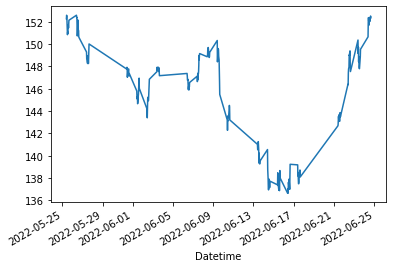

In [79]:
df['ABBV']['Close'].plot()


In [80]:
dates = df.index
dates

DatetimeIndex(['2022-05-25 09:30:00-04:00', '2022-05-25 10:00:00-04:00',
               '2022-05-25 10:30:00-04:00', '2022-05-25 11:00:00-04:00',
               '2022-05-25 11:30:00-04:00', '2022-05-25 12:00:00-04:00',
               '2022-05-25 12:30:00-04:00', '2022-05-25 13:00:00-04:00',
               '2022-05-25 13:30:00-04:00', '2022-05-25 14:00:00-04:00',
               ...
               '2022-06-24 11:30:00-04:00', '2022-06-24 12:00:00-04:00',
               '2022-06-24 12:30:00-04:00', '2022-06-24 13:00:00-04:00',
               '2022-06-24 13:30:00-04:00', '2022-06-24 14:00:00-04:00',
               '2022-06-24 14:30:00-04:00', '2022-06-24 15:00:00-04:00',
               '2022-06-24 15:30:00-04:00', '2022-06-24 16:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=274, freq=None)

In [81]:
datetimemgr.Datetime_range_stock(dates,'2022-05-26','2022-05-27')

DatetimeIndex(['2022-05-26 09:30:00-04:00', '2022-05-26 10:00:00-04:00',
               '2022-05-26 10:30:00-04:00', '2022-05-26 11:00:00-04:00',
               '2022-05-26 11:30:00-04:00', '2022-05-26 12:00:00-04:00',
               '2022-05-26 12:30:00-04:00', '2022-05-26 13:00:00-04:00',
               '2022-05-26 13:30:00-04:00', '2022-05-26 14:00:00-04:00',
               '2022-05-26 14:30:00-04:00', '2022-05-26 15:00:00-04:00',
               '2022-05-26 15:30:00-04:00', '2022-05-27 09:30:00-04:00',
               '2022-05-27 10:00:00-04:00', '2022-05-27 10:30:00-04:00',
               '2022-05-27 11:00:00-04:00', '2022-05-27 11:30:00-04:00',
               '2022-05-27 12:00:00-04:00', '2022-05-27 12:30:00-04:00',
               '2022-05-27 13:00:00-04:00', '2022-05-27 13:30:00-04:00',
               '2022-05-27 14:00:00-04:00', '2022-05-27 14:30:00-04:00',
               '2022-05-27 15:00:00-04:00', '2022-05-27 15:30:00-04:00'],
              dtype='datetime64[ns, America/New_Yo

In [82]:
datetimemgr.Datetime_range_close_stock(dates,'2022-05-26','2022-06-03')

DatetimeIndex(['2022-05-26 15:30:00-04:00', '2022-05-27 15:30:00-04:00',
               '2022-05-31 15:30:00-04:00', '2022-06-01 15:30:00-04:00',
               '2022-06-02 15:30:00-04:00', '2022-06-03 15:30:00-04:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [83]:
k = datetimemgr.Datetime_range_close_stock(dates,'2022-05-26','2022-06-03')
apple = df.loc[k]['ABBV']


In [84]:
profitmgr.profit_percent_stock(df, 'ABBV', '2022-05-26', '2022-06-03')

-2.271216713612759

pandas.core.series.Series

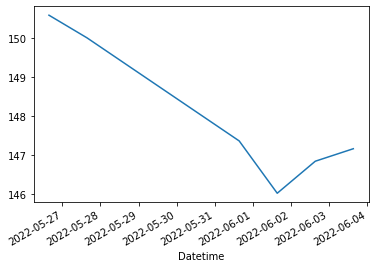

In [85]:
type(stockanalysis.stock_history(df,'ABBV', '2022-05-26', '2022-06-03', 'Close',True))